<a href="https://colab.research.google.com/github/aasrod/Working_With_Timeseries/blob/main/DS_project_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
from google.colab import drive

In [ ]:
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/DS project timeseries/humidity.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,62.0,93.0,87.0,93.0,71.0,67.0,71.0,71.0,100.0,76.0,94.0,76.0,88.0,87.0,83.0,93.0,82.0,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2,2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,92.0,86.0,92.0,70.0,66.0,71.0,70.0,99.0,76.0,94.0,75.0,87.0,87.0,82.0,93.0,81.0,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
3,2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,92.0,86.0,90.0,70.0,66.0,71.0,70.0,99.0,76.0,94.0,75.0,87.0,87.0,82.0,93.0,79.0,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
4,2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,62.0,92.0,86.0,89.0,70.0,65.0,71.0,70.0,99.0,76.0,94.0,74.0,87.0,87.0,82.0,93.0,77.0,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,81.0,NaN,93.0,24.0,72.0,18.0,68.0,37.0,18.0,37.0,45.0,68.0,32.0,31.0,32.0,52.0,32.0,32.0,82.0,39.0,47.0,21.0,NaN,20.0,45.0,27.0,NaN,64.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,71.0,NaN,87.0,21.0,72.0,18.0,73.0,34.0,12.0,35.0,42.0,73.0,27.0,31.0,37.0,65.0,34.0,32.0,73.0,39.0,47.0,21.0,NaN,23.0,48.0,29.0,NaN,59.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,71.0,NaN,93.0,23.0,68.0,17.0,60.0,32.0,15.0,38.0,42.0,50.0,27.0,30.0,37.0,96.0,36.0,39.0,77.0,42.0,53.0,24.0,NaN,27.0,52.0,31.0,NaN,66.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,71.0,NaN,87.0,14.0,63.0,17.0,33.0,30.0,28.0,37.0,45.0,49.0,30.0,35.0,46.0,75.0,39.0,52.0,82.0,52.0,73.0,38.0,NaN,36.0,64.0,26.0,NaN,58.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.isnull().sum()

datetime                0
Vancouver            1826
Portland              449
San Francisco         942
Seattle               289
Los Angeles           152
San Diego             344
Las Vegas             842
Phoenix              1308
Albuquerque           710
Denver               1808
San Antonio           564
Dallas                319
Houston               121
Kansas City           512
Minneapolis           510
Saint Louis          1289
Chicago              1109
Nashville             567
Indianapolis          695
Atlanta               422
Detroit               862
Jacksonville          209
Charlotte             589
Miami                1087
Pittsburgh            522
Toronto               728
Philadelphia          624
New York             1624
Montreal             1696
Boston                449
Beersheba             859
Tel Aviv District    1113
Eilat                 970
Haifa                 818
Nahariyya             817
Jerusalem             906
dtype: int64

In [ ]:
data = data.ffill()

In [ ]:
data.isnull().sum()

datetime             0
Vancouver            1
Portland             1
San Francisco        1
Seattle              1
Los Angeles          1
San Diego            1
Las Vegas            1
Phoenix              1
Albuquerque          1
Denver               1
San Antonio          1
Dallas               1
Houston              1
Kansas City          1
Minneapolis          1
Saint Louis          1
Chicago              1
Nashville            1
Indianapolis         1
Atlanta              1
Detroit              1
Jacksonville         1
Charlotte            1
Miami                1
Pittsburgh           1
Toronto              1
Philadelphia         1
New York             1
Montreal             1
Boston               1
Beersheba            1
Tel Aviv District    1
Eilat                0
Haifa                1
Nahariyya            1
Jerusalem            1
dtype: int64

In [ ]:
data

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,62.0,93.0,87.0,93.0,71.0,67.0,71.0,71.0,100.0,76.0,94.0,76.0,88.0,87.0,83.0,93.0,82.0,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2,2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,92.0,86.0,92.0,70.0,66.0,71.0,70.0,99.0,76.0,94.0,75.0,87.0,87.0,82.0,93.0,81.0,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
3,2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,92.0,86.0,90.0,70.0,66.0,71.0,70.0,99.0,76.0,94.0,75.0,87.0,87.0,82.0,93.0,79.0,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
4,2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,62.0,92.0,86.0,89.0,70.0,65.0,71.0,70.0,99.0,76.0,94.0,74.0,87.0,87.0,82.0,93.0,77.0,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,87.0,81.0,22.0,93.0,24.0,72.0,18.0,68.0,37.0,18.0,37.0,45.0,68.0,32.0,31.0,32.0,52.0,32.0,32.0,82.0,39.0,47.0,21.0,57.0,20.0,45.0,27.0,58.0,64.0,37.0,57.0,60.0,100.0,96.0,96.0,60.0
45249,2017-11-29 21:00:00,87.0,71.0,22.0,87.0,21.0,72.0,18.0,73.0,34.0,12.0,35.0,42.0,73.0,27.0,31.0,37.0,65.0,34.0,32.0,73.0,39.0,47.0,21.0,57.0,23.0,48.0,29.0,58.0,59.0,74.0,57.0,60.0,100.0,96.0,96.0,60.0
45250,2017-11-29 22:00:00,87.0,71.0,22.0,93.0,23.0,68.0,17.0,60.0,32.0,15.0,38.0,42.0,50.0,27.0,30.0,37.0,96.0,36.0,39.0,77.0,42.0,53.0,24.0,57.0,27.0,52.0,31.0,58.0,66.0,74.0,57.0,60.0,100.0,96.0,96.0,60.0
45251,2017-11-29 23:00:00,87.0,71.0,22.0,87.0,14.0,63.0,17.0,33.0,30.0,28.0,37.0,45.0,49.0,30.0,35.0,46.0,75.0,39.0,52.0,82.0,52.0,73.0,38.0,57.0,36.0,64.0,26.0,58.0,58.0,56.0,57.0,60.0,100.0,96.0,96.0,60.0


In [ ]:
data.drop(0, axis=0, inplace=True)
data.isnull().sum()

datetime             0
Vancouver            0
Portland             0
San Francisco        0
Seattle              0
Los Angeles          0
San Diego            0
Las Vegas            0
Phoenix              0
Albuquerque          0
Denver               0
San Antonio          0
Dallas               0
Houston              0
Kansas City          0
Minneapolis          0
Saint Louis          0
Chicago              0
Nashville            0
Indianapolis         0
Atlanta              0
Detroit              0
Jacksonville         0
Charlotte            0
Miami                0
Pittsburgh           0
Toronto              0
Philadelphia         0
New York             0
Montreal             0
Boston               0
Beersheba            0
Tel Aviv District    0
Eilat                0
Haifa                0
Nahariyya            0
Jerusalem            0
dtype: int64

In [ ]:
data['Date'] = pd.to_datetime(data.datetime.values)
data = data.set_index('Date')
data = data.asfreq('D')
data.drop('datetime', axis=1, inplace=True)

In [ ]:
data

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,62.0,93.0,87.0,93.0,71.0,67.0,71.0,71.0,100.0,76.0,94.0,76.0,88.0,87.0,83.0,93.0,82.0,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2012-10-02 13:00:00,90.0,71.0,64.0,67.0,88.0,73.0,18.0,31.0,47.0,70.0,88.0,82.0,64.0,63.0,55.0,75.0,62.0,93.0,76.0,94.0,62.0,78.0,87.0,74.0,93.0,40.0,59.0,51.0,7.0,68.0,75.0,69.0,29.0,51.0,51.0,50.0
2012-10-03 13:00:00,87.0,81.0,42.0,81.0,64.0,64.0,21.0,28.0,50.0,43.0,82.0,68.0,87.0,62.0,75.0,76.0,59.0,100.0,93.0,88.0,87.0,83.0,88.0,83.0,93.0,97.0,72.0,63.0,100.0,83.0,60.0,74.0,29.0,79.0,79.0,65.0
2012-10-04 13:00:00,41.0,77.0,72.0,63.0,82.0,88.0,28.0,37.0,43.0,20.0,67.0,92.0,96.0,87.0,76.0,87.0,87.0,93.0,93.0,100.0,93.0,83.0,88.0,83.0,93.0,80.0,100.0,100.0,100.0,93.0,55.0,53.0,34.0,69.0,69.0,58.0
2012-10-05 13:00:00,49.0,57.0,77.0,66.0,77.0,82.0,22.0,49.0,26.0,59.0,88.0,77.0,82.0,58.0,70.0,77.0,72.0,93.0,82.0,93.0,77.0,88.0,93.0,79.0,72.0,93.0,83.0,94.0,93.0,78.0,48.0,61.0,23.0,72.0,72.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-25 13:00:00,87.0,100.0,22.0,81.0,77.0,66.0,53.0,43.0,36.0,71.0,87.0,71.0,87.0,80.0,80.0,80.0,81.0,40.0,86.0,87.0,66.0,100.0,81.0,57.0,45.0,81.0,100.0,58.0,80.0,93.0,57.0,60.0,100.0,96.0,96.0,60.0
2017-11-26 13:00:00,87.0,76.0,22.0,87.0,93.0,93.0,50.0,43.0,44.0,86.0,77.0,70.0,93.0,65.0,81.0,74.0,74.0,80.0,92.0,65.0,79.0,100.0,86.0,57.0,80.0,59.0,52.0,58.0,92.0,56.0,57.0,60.0,100.0,96.0,96.0,60.0
2017-11-27 13:00:00,87.0,100.0,22.0,87.0,87.0,82.0,37.0,39.0,41.0,33.0,93.0,62.0,54.0,61.0,74.0,45.0,100.0,92.0,80.0,56.0,86.0,100.0,65.0,57.0,64.0,64.0,56.0,58.0,68.0,69.0,57.0,60.0,100.0,96.0,96.0,60.0


In [ ]:
sample = data.iloc[:200]

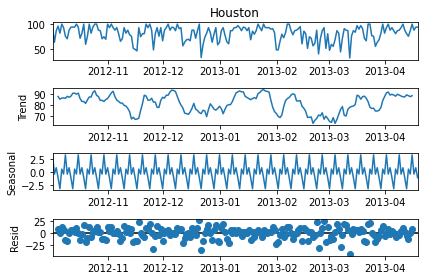

In [ ]:
result = seasonal_decompose(sample['Houston'], model='additive')
fig = result.plot()

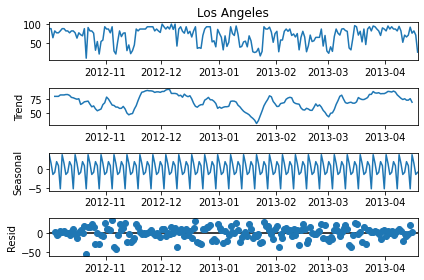

In [ ]:
result = seasonal_decompose(sample['Los Angeles'], model='additive')
fig = result.plot()

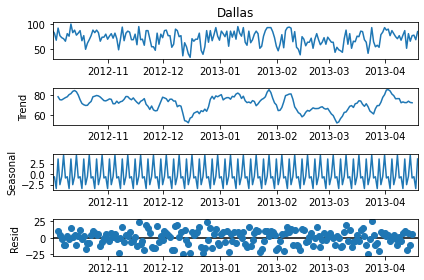

In [ ]:
result = seasonal_decompose(sample['Dallas'], model='additive')
fig = result.plot()

**ADF statics**

In [ ]:
result = adfuller(data['Houston'].values)
print('Houston:')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Houston:
ADF Statistic: -14.014555
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [ ]:
result = adfuller(data['Los Angeles'].values)
print('Los Angeles:')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Los Angeles:
ADF Statistic: -7.351660
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [ ]:
result = adfuller(data['Dallas'].values)
print('Dallas:')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Dallas:
ADF Statistic: -9.504214
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [ ]:
hou_data = pd.DataFrame({
    "d_1": data["Houston"].shift(1), 
    "d_2": data["Houston"].shift(2), 
    "d_3": data["Houston"].shift(3), 
    "d_4": data["Houston"].shift(4),
    "d_5": data["Houston"].shift(5), 
    "d_6": data["Houston"].shift(6), 
    "d_7": data["Houston"].shift(7),
    "d_8": data["Houston"].shift(8),
    "d_9": data["Houston"].shift(9),
    "d_10": data["Houston"].shift(10),
    "d_11": data["Houston"].shift(11),
    "d_12": data["Houston"].shift(12),
    "d_13": data["Houston"].shift(13),
    "d_14": data["Houston"].shift(14),
    "target": data["Houston"]
})

In [ ]:
hou_data

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,target
Date,,,,,,,,,,,,,,,
2012-10-01 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.0
2012-10-02 13:00:00,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.0
2012-10-03 13:00:00,64.0,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0
2012-10-04 13:00:00,87.0,64.0,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0
2012-10-05 13:00:00,96.0,87.0,64.0,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-25 13:00:00,87.0,70.0,82.0,87.0,57.0,57.0,94.0,100.0,100.0,93.0,82.0,93.0,68.0,63.0,87.0
2017-11-26 13:00:00,87.0,87.0,70.0,82.0,87.0,57.0,57.0,94.0,100.0,100.0,93.0,82.0,93.0,68.0,93.0
2017-11-27 13:00:00,93.0,87.0,87.0,70.0,82.0,87.0,57.0,57.0,94.0,100.0,100.0,93.0,82.0,93.0,54.0


In [ ]:
hou_data.dropna(inplace=True,axis=0)
hou_data.shape

(1872, 15)

In [ ]:
hou_x = hou_data.drop(columns='target')
hou_y = pd.DataFrame({'target': hou_data.target})

In [ ]:
tss = TimeSeriesSplit(n_splits=5, max_train_size= 1500, test_size=300)

In [ ]:
all_splits = list(tss.split(hou_x, hou_y))
train, test = all_splits[0]

In [ ]:
x_test = hou_x.iloc[test]
x_train = hou_x.iloc[train]
y_test = hou_y.iloc[test]
y_train = hou_y.iloc[train]

In [ ]:
columns = x_train.columns
scalerx = StandardScaler()

x_train_scaled = scalerx.fit_transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled, columns = columns)

x_test_scaled = scalerx.transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = columns)

y_train_scaled = scalerx.fit_transform(y_train)
y_train_scaled = pd.DataFrame(y_train_scaled, columns = ['temp'])

y_test_scaled = scalerx.transform(y_test)
y_test_scaled = pd.DataFrame(y_test_scaled, columns = ['temp'])

In [ ]:
x_train_scaled

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14
0,1.335198,0.873872,0.871665,0.868119,0.408334,-0.890467,-0.504320,0.800492,1.336484,-0.042079,1.029284,0.342974,-1.415895,0.807509
1,0.874229,1.334761,0.871665,0.868119,0.868405,0.412776,-0.887661,-0.503891,0.799664,1.339090,-0.043677,1.034289,0.350310,-1.431927
2,-0.815989,0.873872,1.332152,0.868119,0.868405,0.872744,0.415698,-0.887534,-0.504042,0.801969,1.335844,-0.041091,1.041433,0.344177
3,-0.047708,-0.816054,0.871665,1.328148,0.868405,0.872744,0.875707,0.416850,-0.887485,-0.502468,0.799364,1.341541,-0.033648,1.039175
4,1.335198,-0.047906,-0.816787,0.868119,1.328476,0.872744,0.875707,0.877221,0.416221,-0.886126,-0.503517,0.803851,1.348600,-0.041932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0.797401,0.566613,1.101909,1.174805,0.638369,0.412776,1.335716,1.337592,-2.191191,-2.420759,-0.426877,1.341541,0.043144,0.266955
368,0.490089,0.797057,0.564674,1.098133,1.175119,0.642760,0.415698,1.337592,1.336484,-2.190564,-2.419518,-0.425155,1.348600,0.035290
369,-0.124536,0.489798,0.794918,0.561433,1.098441,1.179389,0.645703,0.416850,1.336484,1.339090,-2.189598,-2.422289,-0.417606,1.348063
370,0.336433,-0.124721,0.487926,0.791447,0.561691,1.102728,1.182380,0.647035,0.416221,1.339090,1.335844,-2.191851,-2.414185,-0.428042


**LSTM**

In [ ]:
from keras.layers import Dense , Dropout , Input , LSTM, Conv1D, MaxPooling1D, Flatten
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import optimizers
from sklearn.metrics import mean_squared_error
from keras.models import Model

In [ ]:
input = Input(shape=(14,1), name ="Input")
lstm_layer = LSTM(28, activation='relu', return_sequences=True)(input)
hidden_layer1 = LSTM(56, activation='relu' , name="layer1", return_sequences=True)(lstm_layer)
drop = Dropout(0.4)(hidden_layer1)
hidden_layer2 = LSTM(28, activation='relu' , name="layer2")(drop)
output_layer = Dense(1, activation='linear' , name="output")(hidden_layer2)

model = Model(inputs = input, outputs = output_layer, name = "LSTM_Model")
model.summary()

Model: "LSTM_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 14, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 14, 28)            3360      
                                                                 
 layer1 (LSTM)               (None, 14, 56)            19040     
                                                                 
 dropout (Dropout)           (None, 14, 56)            0         
                                                                 
 layer2 (LSTM)               (None, 28)                9520      
                                                                 
 output (Dense)              (None, 1)                 29        
                                                                 
Total params: 31,949
Trainable params: 31,949
Non-traina

In [ ]:
adam = optimizers.Adam()
rms = optimizers.RMSprop()
es = EarlyStopping(monitor='val_loss', mode = 'auto', verbose=1, patience=15)
model.compile(optimizer= adam, loss='mse', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train_scaled, y_train_scaled, epochs=150, batch_size = 32 , verbose=1, callbacks=[es], validation_split=0.2)

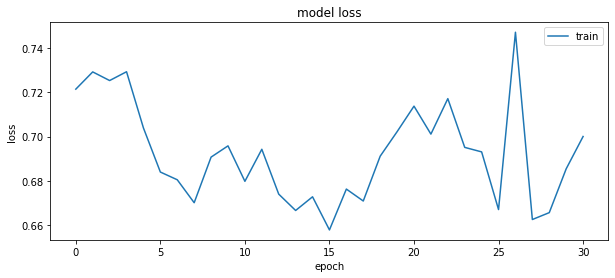

In [ ]:
plt.figure(figsize = (10,4))
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [ ]:
pred = model.predict(x_test_scaled)
mse = mean_squared_error(y_test_scaled, pred)
print(f'MSE: {mse}')

MSE: 0.9481186760410284


**CNN**

In [ ]:
input = Input(shape=(14,1), name ="Input")
conv_layer = Conv1D(filters=32, kernel_size=3, activation='relu')(input)
hidden_layer1 = Conv1D(filters=64, kernel_size=3, activation='relu')(conv_layer)
drop1 = Dropout(0.1)(hidden_layer1)
hidden_layer2 = MaxPooling1D(pool_size=2)(drop1)
flatt_leyer = Flatten()(hidden_layer2)
hidden_layer3 = Dense(64, activation='relu')(flatt_leyer)
drop2 = Dropout(0.2)(hidden_layer3)
hidden_layer4 = Dense(16, activation='relu')(drop2)
output_layer = Dense(1 ,activation='linear' , name="output")(hidden_layer4)

model = Model(inputs=input, outputs=output_layer , name = "CNN_Model")
model.summary()

Model: "CNN_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 14, 1)]           0         
                                                                 
 conv1d_6 (Conv1D)           (None, 12, 32)            128       
                                                                 
 conv1d_7 (Conv1D)           (None, 10, 64)            6208      
                                                                 
 dropout_7 (Dropout)         (None, 10, 64)            0         
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 5, 64)            0         
 1D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 320)               0         
                                                         

In [ ]:
adam = optimizers.Adam()
rms = optimizers.RMSprop()
es = EarlyStopping(monitor='val_loss',mode = 'auto',verbose=1,patience=7)
model.compile(optimizer=adam, loss='mse', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train_scaled, y_train_scaled ,epochs=150,batch_size = 32 ,verbose=1,callbacks=[es],validation_split=0.2)

Epoch 1/150
10/10 [==============================] - 2s 54ms/step - loss: 1.0789 - accuracy: 0.0000e+00 - val_loss: 0.7050 - val_accuracy: 0.0000e+00
Epoch 2/150
10/10 [==============================] - 0s 11ms/step - loss: 1.0262 - accuracy: 0.0000e+00 - val_loss: 0.6603 - val_accuracy: 0.0000e+00
Epoch 3/150
10/10 [==============================] - 0s 12ms/step - loss: 0.9824 - accuracy: 0.0000e+00 - val_loss: 0.7074 - val_accuracy: 0.0000e+00
Epoch 4/150
10/10 [==============================] - 0s 18ms/step - loss: 0.9383 - accuracy: 0.0000e+00 - val_loss: 0.6624 - val_accuracy: 0.0000e+00
Epoch 5/150
10/10 [==============================] - 0s 14ms/step - loss: 0.9193 - accuracy: 0.0000e+00 - val_loss: 0.7132 - val_accuracy: 0.0000e+00
Epoch 6/150
10/10 [==============================] - 0s 14ms/step - loss: 0.8934 - accuracy: 0.0000e+00 - val_loss: 0.6785 - val_accuracy: 0.0000e+00
Epoch 7/150
10/10 [==============================] - 0s 14ms/step - loss: 0.8761 - accuracy: 0.0000e

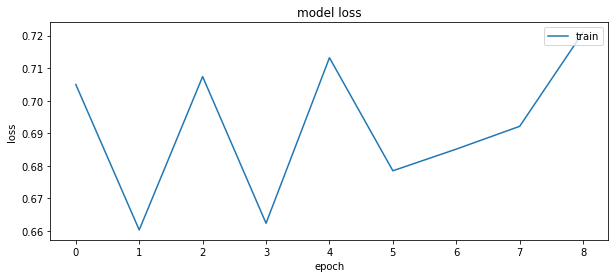

In [ ]:
plt.figure(figsize = (10,4))
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [ ]:
pred = model.predict(x_test_scaled)
mse = mean_squared_error(y_test_scaled, pred)
print(f'MSE: {mse}')

MSE: 0.9481186760410284


**FBProphet**

In [ ]:
import fbprophet
from fbprophet import Prophet

In [ ]:
s = int(data['Houston'].size*0.8)
train = pd.DataFrame(data['Houston'][:s])
test = pd.DataFrame(data['Houston'][s:])

train['date'] = train.index
test['date'] = test.index

In [ ]:
train

,Houston,date
Date,,
2012-10-01 13:00:00,93.0,2012-10-01 13:00:00
2012-10-02 13:00:00,64.0,2012-10-02 13:00:00
2012-10-03 13:00:00,87.0,2012-10-03 13:00:00
2012-10-04 13:00:00,96.0,2012-10-04 13:00:00
2012-10-05 13:00:00,82.0,2012-10-05 13:00:00
...,...,...
2016-11-12 13:00:00,100.0,2016-11-12 13:00:00
2016-11-13 13:00:00,67.0,2016-11-13 13:00:00
2016-11-14 13:00:00,93.0,2016-11-14 13:00:00


In [ ]:
train.columns = ['y','ds']
test.columns = ['y','ds']
# define the model
model = Prophet()
# fit the model
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast = model.predict(pd.DataFrame(test['ds']))
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2016-11-17 13:00:00,85.245214,69.824724,99.500760
1,2016-11-18 13:00:00,84.790256,70.122258,100.110661
2,2016-11-19 13:00:00,86.177883,72.104484,101.182327
3,2016-11-20 13:00:00,87.294416,72.154098,101.430121
4,2016-11-21 13:00:00,88.805963,73.569805,103.649380
...,...,...,...,...
373,2017-11-25 13:00:00,90.499563,76.080252,105.946527
374,2017-11-26 13:00:00,91.691385,77.130977,106.652911
375,2017-11-27 13:00:00,93.228061,77.877093,109.243647
376,2017-11-28 13:00:00,92.070001,76.698629,107.265383


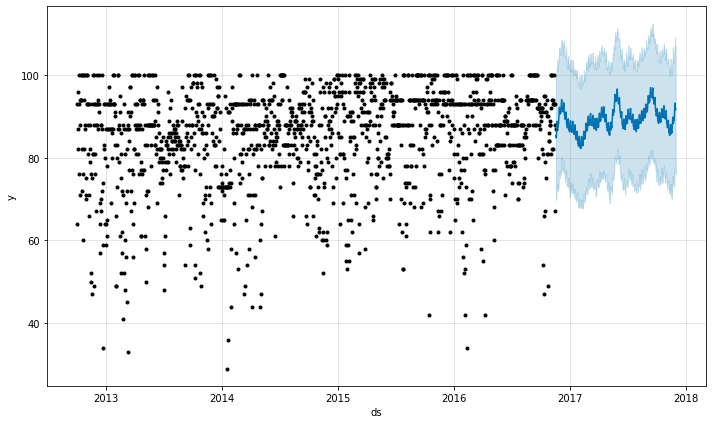

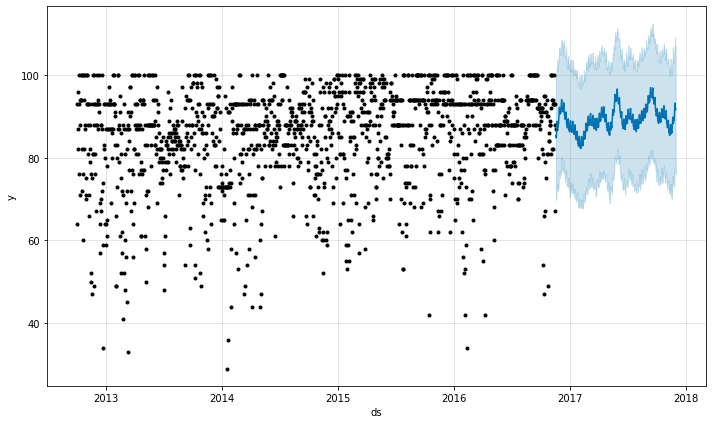

In [ ]:
model.plot(forecast)

In [ ]:
diff = pd.merge(forecast,test ,on="ds")
diff = diff[['ds','y','yhat']]
diff

,ds,y,yhat
0,2016-11-17 13:00:00,100.0,85.245214
1,2016-11-18 13:00:00,94.0,84.790256
2,2016-11-19 13:00:00,70.0,86.177883
3,2016-11-20 13:00:00,78.0,87.294416
4,2016-11-21 13:00:00,100.0,88.805963
...,...,...,...
373,2017-11-25 13:00:00,87.0,90.499563
374,2017-11-26 13:00:00,93.0,91.691385
375,2017-11-27 13:00:00,54.0,93.228061
376,2017-11-28 13:00:00,82.0,92.070001


In [ ]:
mse = mean_squared_error(diff['y'], diff['yhat'])
print(f'MSE: {mse}')

MSE: 214.23120554221737
